In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
my_nc_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/fcst_cal_MVA.nc'
data = Dataset(my_nc_file, mode='r')

In [3]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
data.close()
ens_mean = np.mean(tass, axis=(0,1))
print(ens_mean)

[[299.76675 299.63815 299.4802  ... 297.4629  297.51306 297.5483 ]
 [299.74667 299.60947 299.47116 ... 298.04837 298.10675 298.14124]
 [299.649   299.60056 299.47116 ... 298.52853 298.56583 298.59656]
 ...
 [300.1077  300.10443 300.13095 ... 299.62292 299.81815 300.08878]
 [300.0854  300.09604 300.0883  ... 300.33917 300.2847  300.2615 ]
 [300.04245 300.03577 300.0466  ... 300.42987 300.39703 300.33383]]


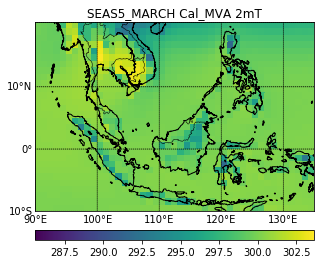

In [4]:
# Get some parameters for the Mercator Projection
#A cylindrical, conformal projection. Conformal projections preserve local shape.
#A map projection is conformal when at any point the scale is the same in every direction
lon_0 = lons.mean()
lat_0 = lats.mean()

#m = Basemap(width=5000000,height=3500000,
#            resolution='l',projection='gnom',\
#            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ens_mean))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('SEAS5_MARCH Cal_MVA 2mT')

plt.show()